Se detectaron 12 monedas
Verdaderos Positivos: 12 Falsos Positivos:0 Falsos Negativos: 0
Precisión: 1.00, Recall: 1.00, F1 Score: 1.00


<ipython-input-3-34486c293d44>:67: RuntimeWarning: invalid value encountered in sqrt
  distancia = np.sqrt((gt[0] - det[0]) * 2 + (gt[1] - det[1]) * 2)


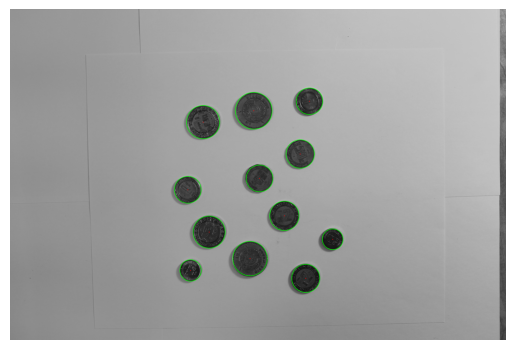

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detectar_monedas(imagen_path, ground_truth, tolerancia=10):
    # Cargar la imagen en escala de grises
    imagen = cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)

    # Aplicar suavizado para reducir ruido
    imagen_suavizada = cv2.GaussianBlur(imagen, (9, 9), 2)

    # Aplicar el detector de bordes de Canny
    bordes = cv2.Canny(imagen_suavizada, 100, 200)

    # Aplicar la Transformada de Hough para detectar círculos
    monedas = cv2.HoughCircles(
        bordes,
        cv2.HOUGH_GRADIENT,
        dp=2,
        minDist=100,
        param1=75,
        param2=65,
        minRadius=0,
        maxRadius=200
    )

    # Dibujar los círculos detectados y contarlos
    salida = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)
    detecciones = []
    if monedas is not None:
        monedas = np.round(monedas[0, :]).astype("int")
        for (x, y, r) in monedas:
            detecciones.append((x, y, r))
            # Dibujar el círculo
            cv2.circle(salida, (x, y), r, (0, 255, 0), 4)
            # Dibujar el centro del círculo
            cv2.circle(salida, (x, y), 2, (0, 0, 255), 3)
    print(f"Se detectaron {len(detecciones)} monedas")

    # Evaluar la detección de monedas
    precision, recall, f1 = evaluar_deteccion(detecciones, ground_truth, tolerancia)
    print(f"Precisión: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

    # Mostrar la imagen con los círculos detectados
    plt.imshow(cv2.cvtColor(salida, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

def evaluar_deteccion(detecciones, ground_truth, tolerancia=10):
    """
    Evalúa la detección de monedas.

    Parámetros:
    - detecciones: Lista de círculos detectados [(x, y, radio)].
    - ground_truth: Lista de círculos verdaderos [(x, y, radio)].
    - tolerancia: Tolerancia en píxeles para considerar una detección como correcta.

    Retorna:
    - Precisión, Exhaustividad (Recall), y F1 Score.
    """
    TP, FP, FN = 0, 0, 0

    # Para cada círculo verdadero, verificamos si fue detectado
    for gt in ground_truth:
        encontrado = False
        for det in detecciones:
            distancia = np.sqrt((gt[0] - det[0]) * 2 + (gt[1] - det[1]) * 2)
            diferencia_radio = abs(gt[2] - det[2])

            # Si la distancia entre centros y el radio son menores que la tolerancia, cuenta como TP
            if distancia <= tolerancia and diferencia_radio <= tolerancia:
                TP += 1
                encontrado = True
                break
        if not encontrado:
            FN += 1
    print(f"Verdaderos Positivos: {TP} Falsos Positivos:{FP} Falsos Negativos: {FN}" )
    # Cada detección que no se encuentra en el ground truth es un FP
    FP = len(detecciones) - TP

    # Calcular métricas
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

# Ejemplo de uso:
# Supongamos que tenemos una lista de ground truth para la imagen
ground_truth = [(1715, 1919, 138), (2099, 875, 158), (2363, 1779, 126), (1663, 973, 143), (2579, 793, 114), (1531, 1555, 115), (2067, 2147, 148), (1555, 2249, 92), (2499, 1247, 122), (2547, 2317, 121), (2779, 1981, 89), (2149, 1457, 115)]  # Coordenadas y radios de las monedas reales
detectar_monedas("IMG_B_Foco.JPG", ground_truth)

Para el 3

Se detectaron 12 monedas con valores estimados: [None, None, None, None, None, None, None, 10, None, None, 5, None]
Verdaderos Positivos: 12 Falsos Positivos:0 Falsos Negativos: 0
Precisión: 1.00, Recall: 1.00, F1 Score: 1.00


<ipython-input-4-2b026c467fcb>:80: RuntimeWarning: invalid value encountered in sqrt
  distancia = np.sqrt((gt[0] - det[0]) * 2 + (gt[1] - det[1]) * 2)


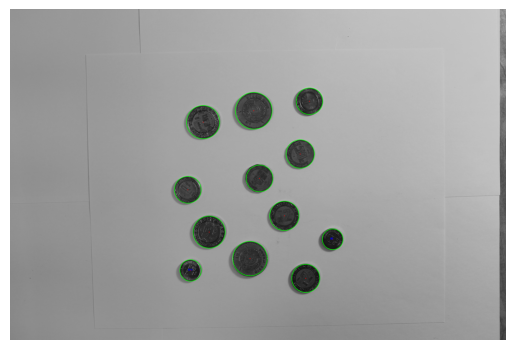

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define los rangos de radios en píxeles para cada tipo de moneda y su valor
RANGO_RADIOS = {
    (50, 60): 0.5,   # 50 centavos
    (61, 70): 1,     # 1 peso
    (71, 80): 2,     # 2 pesos
    (81, 90): 5,     # 5 pesos
    (91, 100): 10    # 10 pesos
}

def detectar_monedas(imagen_path, ground_truth, tolerancia=10):
    # Cargar la imagen en escala de grises
    imagen = cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)

    # Aplicar suavizado para reducir ruido
    imagen_suavizada = cv2.GaussianBlur(imagen, (9, 9), 2)

    # Aplicar el detector de bordes de Canny
    bordes = cv2.Canny(imagen_suavizada, 100, 200)

    # Aplicar la Transformada de Hough para detectar círculos
    monedas = cv2.HoughCircles(
        bordes,
        cv2.HOUGH_GRADIENT,
        dp=2,
        minDist=100,
        param1=75,
        param2=65,
        minRadius=0,
        maxRadius=200
    )

    # Dibujar los círculos detectados y contarlos
    salida = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)
    detecciones = []
    valores_monedas = []

    if monedas is not None:
        monedas = np.round(monedas[0, :]).astype("int")
        for (x, y, r) in monedas:
            detecciones.append((x, y, r))

            # Identificar el valor de la moneda según el radio
            valor = obtener_valor_moneda(r)
            valores_monedas.append(valor)

            # Dibujar el círculo y el valor
            cv2.circle(salida, (x, y), r, (0, 255, 0), 4)
            cv2.circle(salida, (x, y), 2, (0, 0, 255), 3)
            if valor is not None:
                cv2.putText(salida, f"${valor}", (x-20, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    print(f"Se detectaron {len(detecciones)} monedas con valores estimados: {valores_monedas}")

    # Evaluar la detección de monedas
    precision, recall, f1 = evaluar_deteccion(detecciones, ground_truth, tolerancia)
    print(f"Precisión: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

    # Mostrar la imagen con los círculos detectados
    plt.imshow(cv2.cvtColor(salida, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

def obtener_valor_moneda(radio):
    """Determina el valor de la moneda según su radio."""
    for (min_radio, max_radio), valor in RANGO_RADIOS.items():
        if min_radio <= radio <= max_radio:
            return valor
    return None  # Retorna None si el radio no coincide con ningún valor conocido

def evaluar_deteccion(detecciones, ground_truth, tolerancia=10):
    TP, FP, FN = 0, 0, 0

    for gt in ground_truth:
        encontrado = False
        for det in detecciones:
            distancia = np.sqrt((gt[0] - det[0]) * 2 + (gt[1] - det[1]) * 2)
            diferencia_radio = abs(gt[2] - det[2])

            if distancia <= tolerancia and diferencia_radio <= tolerancia:
                TP += 1
                encontrado = True
                break
        if not encontrado:
            FN += 1
    print(f"Verdaderos Positivos: {TP} Falsos Positivos:{FP} Falsos Negativos: {FN}" )

    FP = len(detecciones) - TP
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

# Ejemplo de uso:
ground_truth = [(1715, 1919, 138), (2099, 875, 158), (2363, 1779, 126), (1663, 973, 143), (2579, 793, 114), (1531, 1555, 115), (2067, 2147, 148), (1555, 2249, 92), (2499, 1247, 122), (2547, 2317, 121), (2779, 1981, 89), (2149, 1457, 115)]
detectar_monedas("IMG_B_Foco.JPG", ground_truth)
